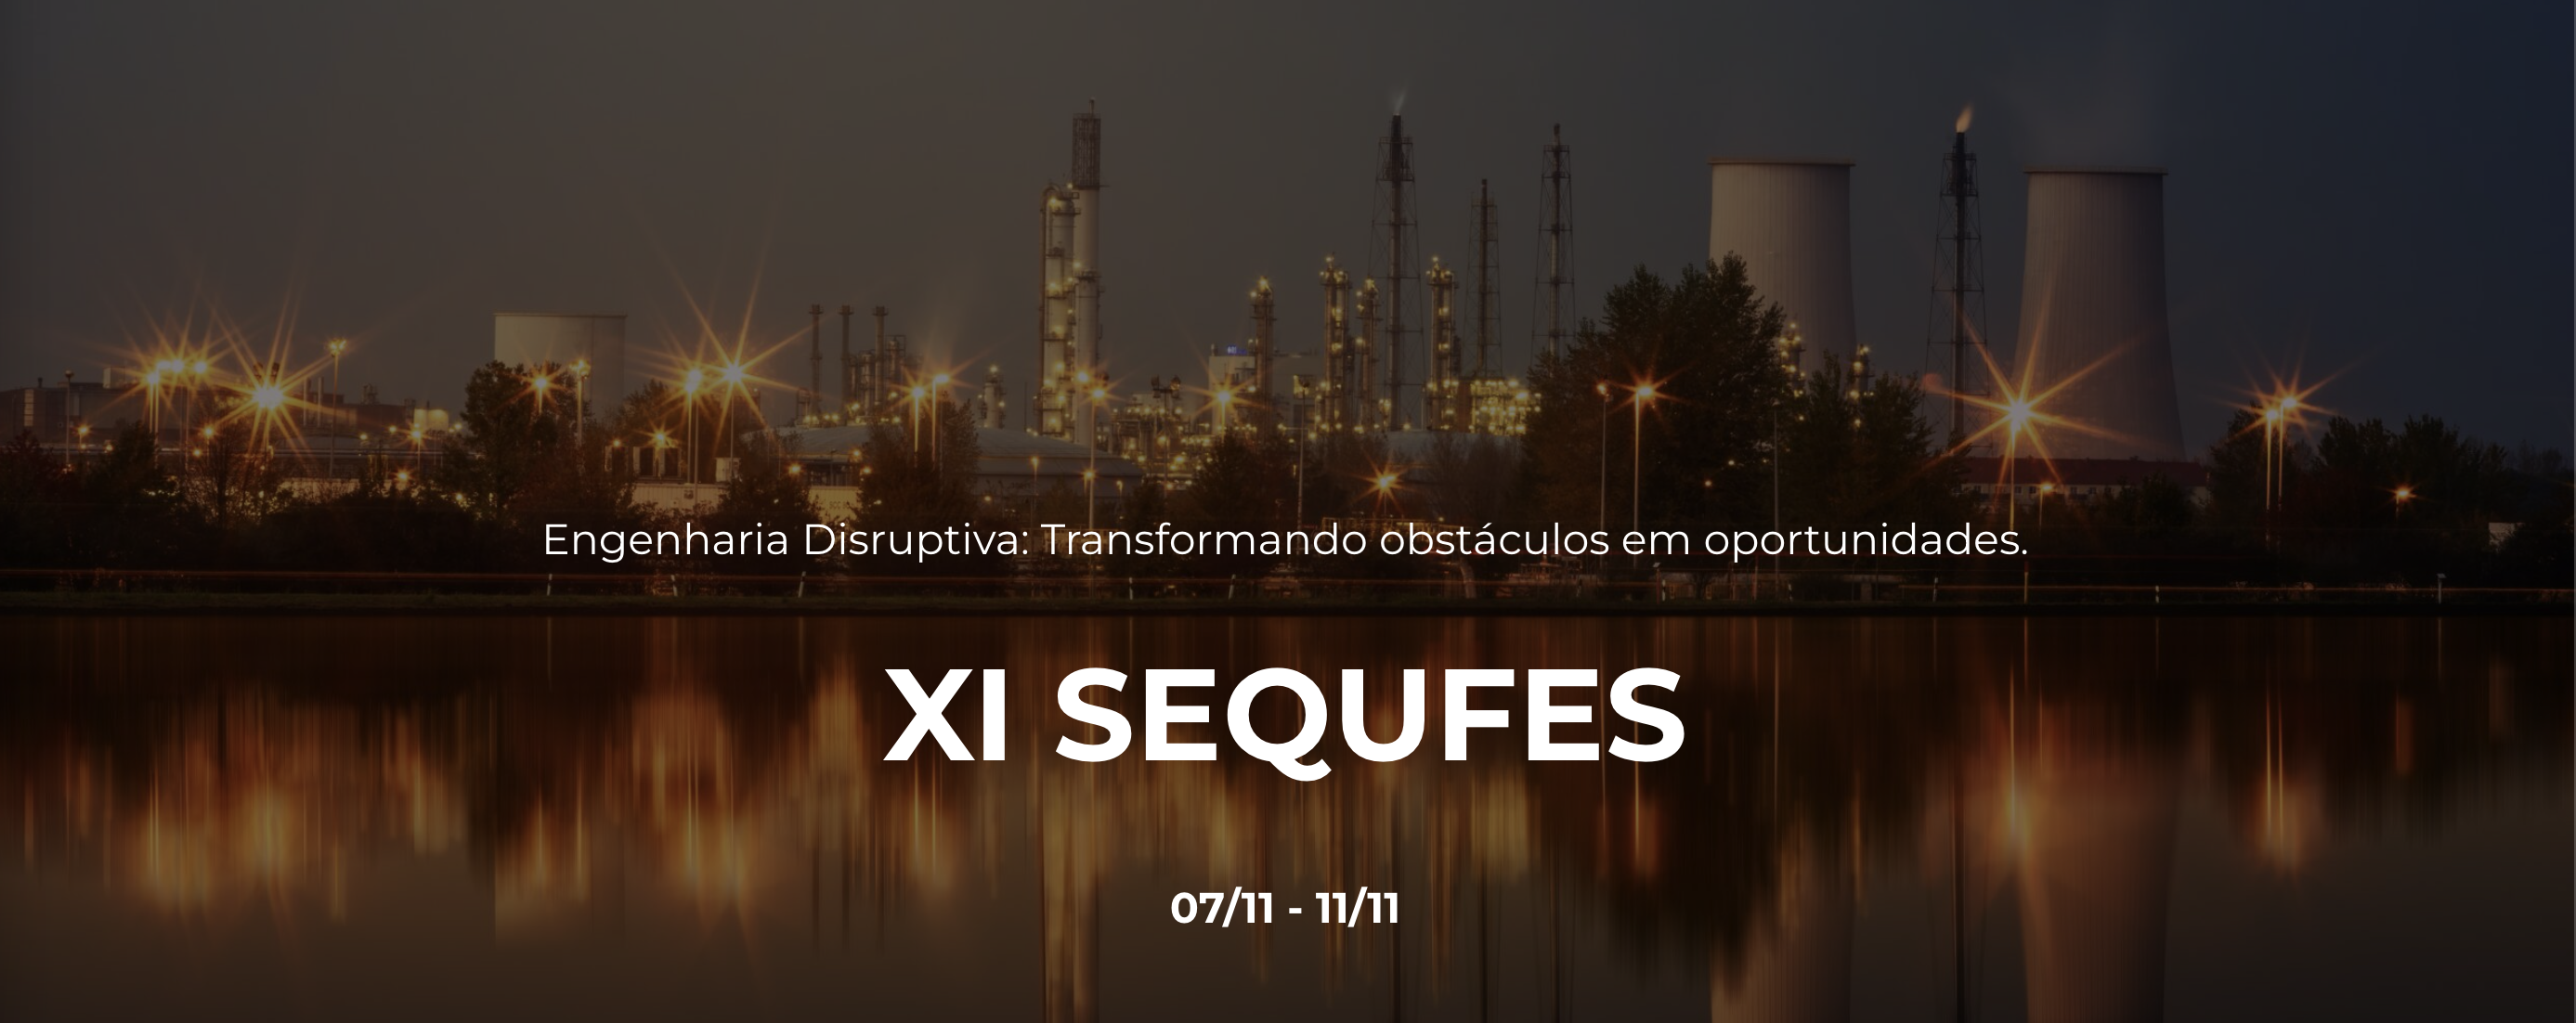

# Sobre este notebook

* **Semana Acadêmica de Engenharia Química da UFES 2022**

* **Analise de dados: carreiras e suas aplicações**

* **Autores**: [Adrielle Alecrim](https://www.linkedin.com/in/adrielle-alecrim-039431169/) e [Luís Molina](https://www.linkedin.com/in/lfgmolina/)

* **Material no Github:**
https://github.com/luisfelipemolina/ufes-semana-eng-quimica-2022

## Case


*   **Objetivo**: Tentar predizer o pH de uma solução baseado apenas na cor do indicador ácido-base
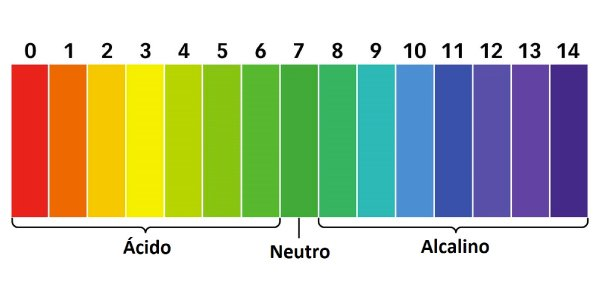

*Fonte: https://clubedaquimica.com/2021/04/02/como-sao-os-indicadores-universais/*


## Informações adicionais

*   Usaremos a escala RGB de cores (vermelho, verde e azul);
*   Cada cor varia de intensidade de 0 - 255;
*   Fonte dos dados: https://www.kaggle.com/datasets/robjan/ph-recognition



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('ph-data.csv')

In [ ]:
df

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB


<function matplotlib.pyplot.show(*args, **kw)>

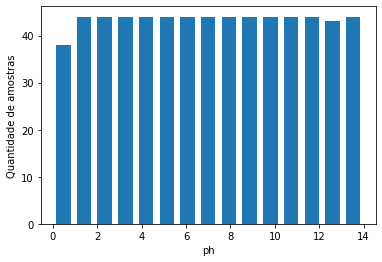

In [ ]:
plt.hist(df['label'], 15, rwidth=0.7)
plt.xlabel('ph')
plt.ylabel('Quantidade de amostras')
plt.show

In [ ]:
df.isna().sum()

blue     0
green    0
red      0
label    0
dtype: int64

## O Modelo
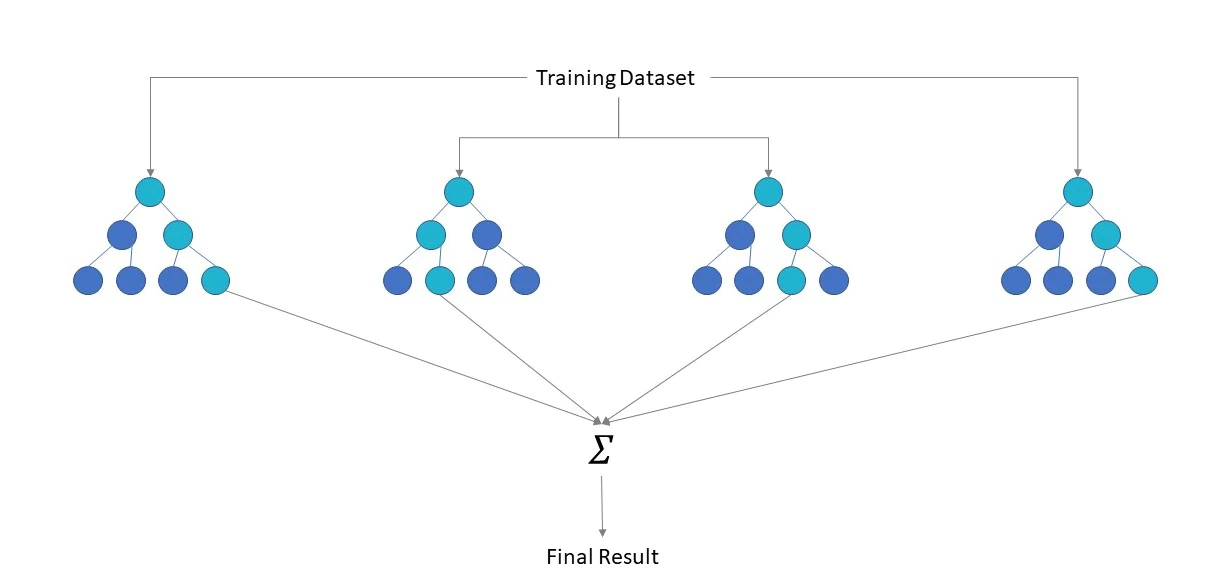

Fonte: https://www.ibm.com/cloud/learn/random-forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

In [ ]:
X = df.drop(['label'], axis=1).astype(int)
Y = df['label'].astype(int)

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split( 
        X, Y, test_size = 0.20, random_state = 42, stratify=Y)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(xTrain, yTrain) 
yPred = rfc.predict(xTest) 

In [ ]:
acc = accuracy_score(yTest, yPred) 
print("A acurácia do modelo é de {}".format(acc)) 

A acurácia do modelo é de 0.7709923664122137


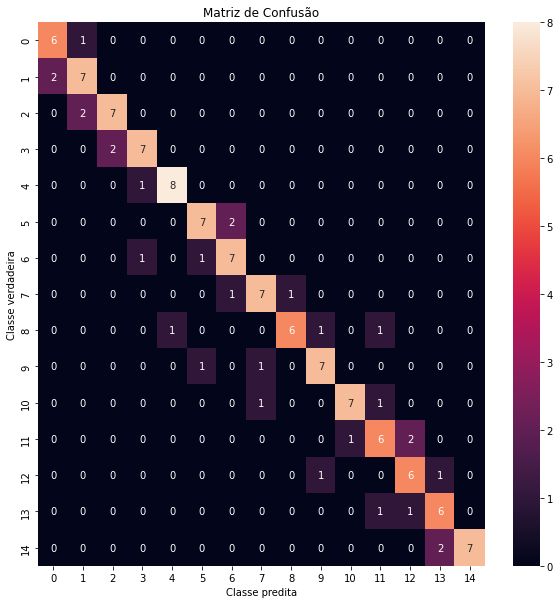

In [ ]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12', '13', '14'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Matriz de Confusão") 
plt.ylabel('Classe verdadeira') 
plt.xlabel('Classe predita') 
plt.show() 